In [21]:
import networkx as nx
from parse import read_input_file, write_output_file
from utils import is_valid_network, average_pairwise_distance, average_pairwise_distance_fast
import sys
from collections import defaultdict
import queue

In [22]:
def solve(G):

    # if by luck there's a node connecting to all other verts, return it immediately
    for node in G.nodes:
        if len(list(nx.neighbors(G, node))) == nx.number_of_nodes(G) - 1:
            min_tree = nx.Graph()
            min_tree.add_node(node)
            return min_tree

    naive_tree = helper(G)

    tree = nx.minimum_spanning_tree(G)
    cost = average_pairwise_distance_fast(tree)

    # max leaf heap containing (weight, leaf_edge) tuples
    leaf_heap = queue.PriorityQueue()
    # keep track of leaves in the heap
    leaves_in_heap = set()

    # keep pruning heaviest leaf from mst until the heaviest leaf becomes too light
    # or the tree is no longer dominating
    while True:
        # (node, degree) pairs
        all_degrees = tree.degree(tree.nodes)
        
        # find all leaves
        leaves = []
        for node, deg in all_degrees:
            if deg == 1:
                leaves.append(node)

        # add leaves to PQ
        for leaf in leaves:
            leaf_neighbor = list(nx.neighbors(tree, leaf))[0]
            leaf_weight = G[leaf][leaf_neighbor]['weight']
            
            # negate weight to use minPQ as maxPQ
            entry = (-leaf_weight, (leaf, leaf_neighbor))
            if entry not in leaves_in_heap:
                leaf_heap.put(entry)
                leaves_in_heap.add(entry)
        
        heaviest = leaf_heap.get()
        weight = -heaviest[0]
        edge = heaviest[1]
        tree.remove_edge(edge[0], edge[1])
        tree.remove_node(edge[0])
        # if removing the edge makes the tree non-dominating, put it back
        if not nx.is_dominating_set(G, tree):
            tree.add_edge(edge[0], edge[1], weight=weight)
            break

        # if removing the edge results in greater cost, put it back
        temp_cost = average_pairwise_distance_fast(tree)
        if temp_cost > cost:
            tree.add_edge(edge[0], edge[1], weight=weight)
            break

        # the leaf is officially removed; update leaves set and cost
        leaves_in_heap.remove(heaviest)
        cost = temp_cost

    if naive_tree is not None:
        naive_cost = average_pairwise_distance_fast(naive_tree)
        if naive_cost < cost:
            return naive_tree
    
    return tree

# naive brute forcy thing hehe
def helper(G):
    T = None
    if G.size() == len(G) - 1:
        all_nodes = G.nodes()
        T = G.copy()
        for n in all_nodes():
            cost = average_pairwise_distance_fast(G)
            if G.degree(n) == 1:
                original_graph = T.copy()
                T.remove_node(n)
                temp_cost = average_pairwise_distance_fast(T)
                if temp_cost > cost:
                    T = original_graph
                else:
                    cost = temp_cost
    el = list(G.edges)
    el.sort()
    if el == [(0, 2), (1, 3), (1, 4), (2, 1), (2, 3)]:
        T = G.copy()
        T.remove_node(0)
        T.remove_node(4)
        T.remove_node(3)
        # all_nodes = G.nodes
        # for n in all_nodes():
        #   cost = average_pairwise_distance_fast(G)
        #   if G.degree(n) == 1 or G.degree(n) == 2:
        #       original_graph = T.copy()
        #       T.remove_node(n)
        #       temp_cost =average_pairwise_distance_fast(T)
        #       if temp_cost > cost:
        #           T = original_graph
        #       else:
        #           cost = temp_cost
    if T is not None and is_valid_network(G, T):
        return T
    else:
        return None

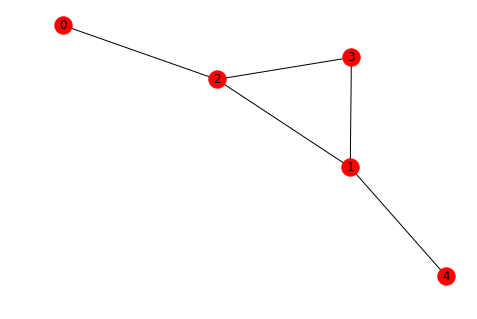

In [23]:
filenum = "296"
path = "./inputs/small-{}.in".format(filenum)
G = read_input_file(path)
T = solve(G)
nx.draw(G, with_labels=True)

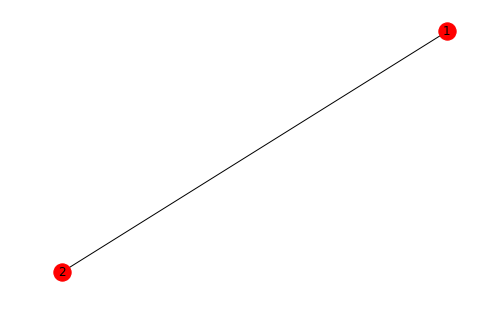

In [24]:
nx.draw(T, with_labels=True)

In [25]:
average_pairwise_distance(T)

1.0

In [26]:
is_valid_network(G, T)

True